<a href="https://colab.research.google.com/github/marcelogeomac/MachineLearning_ClassificacaoRegressao/blob/main/MachineLearning_ClassificacaoRegressao_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Identificação: Marcelo Santos da Cruz (2549724)

#Classificação e predição de cobertura de solo urbano.

Dataset contendo dados de treino e teste para uso academico de algorítimos de Machine Learning no intuito de classificar cobertura de solo urbano a partir de dados obitidos em imagem de alta resolução.

Informações espectrais em várias escalas, tamanhos, forma e textura.

Há um baixo numero de amostras de treinamento para cada classe (14 - 30) e um alto número de variáveis de classificação (148) sendo assim um ótimo conjunto de dados para testar métodos de seleção de recursos.

# Objetivo

Este projeto tem como objetivo aplicar algoritmos de machine learning para classificação e predição de coberturas de solo a partir de imagem: árvores, grama, solo, concreto, asfalto, edifícios, carros, piscinas e sombras.

# Especificação Técnica

Dataset: Para desenvolvimento desse projeto, será utilizado o dataset encontrado no sítio (https://archive.ics.uci.edu/) denominado Urban Land Cover Data set, disponível em: <https://archive.ics.uci.edu/ml/machine-learning-databases/00295/>.

Formato: A base de dados está em formato CSV, estando divivida em dois domínios (testing.csv e training.csv), colunas classe(ou categoria), dados numéricos e texto.

Métodos de Pŕe-processamento: Necessário importar dataset no AWS Glue Studio para avaliação dos dados e utilização de ferramentas de transformação quando for o caso.

Algoritmos Avaliados: Serão avaliados os algoritmos de Classificação, Regressão Logística utilizando método supervisionado.

# Bibliografia
Mãos à Obra: Aprendizado de Máquina com Scikit-Learning & TensorFlow, Géron, Aurélio - Editora Alta Books
Youtube Curso Deep Learning - UTFPR - português Prº Dalcimar Casanova


# **PREPARAÇÃO DE DADOS**

# Importação da biblioteca Pandas e conexão com o dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWjQr-FA14cWkbRNebX9BwNe2tFTAm-iQcHnxHa30-oyMwWYMDumAwg
Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Big Data e Inteligencia Analitica/Curso_Uniasselvi/Machine_Learning_I-Classificacao-Regressao/Dataset/Urban Land Cover Data Set/testing.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Big Data e Inteligencia Analitica/Curso_Uniasselvi/Machine_Learning_I-Classificacao-Regressao/Dataset/Urban Land Cover Data Set/training.csv')

In [ ]:
# Concatenar os dois arquivos do dataset
frames = [df1, df2]
df = pd.concat(frames)

## Exibição de trecho de dados

In [ ]:
df.head(10)

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40,Bright_40,Compact_40,ShpIndx_40,Mean_G_40,Mean_R_40,Mean_NIR_40,SD_G_40,SD_R_40,SD_NIR_40,LW_40,GLCM1_40,Rect_40,GLCM2_40,Dens_40,Assym_40,...,Round_120,Bright_120,Compact_120,ShpIndx_120,Mean_G_120,Mean_R_120,Mean_NIR_120,SD_G_120,SD_R_120,SD_NIR_120,LW_120,GLCM1_120,Rect_120,GLCM2_120,Dens_120,Assym_120,NDVI_120,BordLngth_120,GLCM3_120,BrdIndx_140,Area_140,Round_140,Bright_140,Compact_140,ShpIndx_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,concrete,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,11.24,11.47,11.24,8.18,0.43,0.78,6.64,0.87,0.99,-0.10,100,4322.47,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,11.24,11.47,11.24,8.18,0.43,0.78,6.64,0.87,0.99,...,2.43,189.73,3.62,3.40,163.61,201.29,204.28,25.25,28.33,28.30,3.82,0.79,0.57,8.35,0.96,0.96,-0.10,1188,1298.99,2.93,9172,2.50,185.14,3.94,3.95,159.45,196.43,199.53,27.81,31.55,31.15,5.04,0.80,0.58,8.56,0.82,0.98,-0.10,1512,1287.52
1,shadow,1.59,864,0.94,47.56,1.41,1.87,36.82,48.78,57.09,8.15,8.02,8.36,3.05,0.43,0.85,6.75,1.81,0.73,-0.14,220,3331.33,1.08,1353,0.46,49.12,1.09,1.33,38.29,50.40,58.67,8.84,9.97,10.55,3.70,0.51,0.96,6.96,1.67,0.86,...,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74,1.07,1377,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74
2,shadow,1.41,409,1.00,51.38,1.37,1.53,41.72,51.96,60.48,8.11,9.20,9.61,1.94,0.54,0.86,6.51,1.82,0.69,-0.11,124,2816.16,1.75,1094,1.91,49.05,1.84,1.98,40.06,50.07,57.02,10.54,10.81,11.55,2.57,0.49,0.75,6.93,1.49,0.88,...,2.00,46.57,2.78,2.79,40.01,46.34,53.36,14.49,11.78,12.31,3.57,0.65,0.60,7.11,1.16,0.93,-0.07,602,1432.44,3.33,5932,1.69,55.06,2.68,3.89,59.76,48.66,56.76,30.65,18.59,18.75,3.09,0.90,0.63,8.32,1.38,0.84,0.10,1198,720.38
3,tree,2.58,187,1.91,70.08,3.41,3.11,93.13,55.20,61.92,28.60,15.88,15.09,3.23,0.73,0.50,7.28,1.03,0.89,0.26,170,2442.01,2.86,871,2.22,90.21,3.34,3.93,117.16,72.76,80.70,42.07,27.05,27.38,5.25,0.84,0.51,8.56,0.89,0.95,...,1.65,69.80,2.20,3.22,86.22,58.03,65.15,47.93,26.70,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524,891.36,2.18,1660,1.65,69.80,2.20,3.22,86.22,58.03,65.15,47.93,26.70,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524,891.36
4,asphalt,2.60,116,2.05,89.57,3.06,3.02,73.17,94.89,100.64,5.41,5.20,5.27,2.30,0.43,0.59,6.02,1.23,0.82,-0.13,130,4912.28,4.02,501,2.33,100.69,4.29,4.40,83.66,106.21,112.19,15.39,16.50,16.44,2.24,0.64,0.45,7.28,1.13,0.79,...,1.05,96.24,2.00,2.56,82.84,100.31,105.55,30.51,32.60,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496,1194.76,2.53,2351,1.05,96.24,2.00,2.56,82.84,100.31,105.55,30.51,32.60,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496,1194.76
5,building,1.30,727,0.34,189.54,1.37,1.35,177.71,188.86,202.07,6.82,6.67,6.98,1.37,0.48,0.89,6.49,2.24,0.25,-0.03,146,2944.01,2.06,1011,1.36,188.59,1.99,2.14,177.04,187.66,201.08,7.69,7.78,8.10,1.56,0.54,0.78,6.69,1.96,0.40,...,2.74,184.05,6.37,7.17,192.87,175.16,184.12,28.69,31.87,30.39,1.60,0.88,0.20,8.55,0.99,0.77,0.05,2084,853.23,5.99,9815,2.21,198.23,3.89,6.23,197.04,192.86,204.78,25.74,34.33,34.04,1.68,0.86,0.16,8.43,1.10,0.69,0.01,2468,924.57
6,asphalt,2.33,457,1.03,78.03,2.41,2.50,62.75,83.78,87.57,7.79,7.89,8.17,2.09,0.56,0.64,6.66,1.63,0.71,-0.14,214,3020.89,3.71,1476,1.80,76.45,2.62,3.81,61.83,81.51,86.01,11.31,10.44,10.45,1.40,0.57,0.61,7.05,1.61,0.59,...,2.43,71.07,4.11,6.09,59.19,74.65,79.37,20.46,21.64,21.67,1.93,0.78,0.50,7.93,1.28,0.72,-0.12,2256,1246.38,5.96,9484,2.38,68.47,3.72,6.33,57.15,71.85,76.40,21.00,22.69,22.85,1.93,0.80,0.47,8.02,1.28,0.76,-0.11,2466,1178.71
7,grass,2.81,213,1.70,186.84,2.37,2.98,195.35,183.20,181.97,7.08,6.37,6.92,1.83,0.50,0.66,6.41,1.59,0.54,0.03,174,3439.14,3.54,666,1.84,190.32,2.71

In [ ]:
df.info(verbose=True) # data tyoe de todos os campos do dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675 entries, 0 to 167
Data columns (total 148 columns):
 #   Column         Dtype  
---  ------         -----  
 0   class          object 
 1   BrdIndx        float64
 2   Area           int64  
 3   Round          float64
 4   Bright         float64
 5   Compact        float64
 6   ShpIndx        float64
 7   Mean_G         float64
 8   Mean_R         float64
 9   Mean_NIR       float64
 10  SD_G           float64
 11  SD_R           float64
 12  SD_NIR         float64
 13  LW             float64
 14  GLCM1          float64
 15  Rect           float64
 16  GLCM2          float64
 17  Dens           float64
 18  Assym          float64
 19  NDVI           float64
 20  BordLngth      int64  
 21  GLCM3          float64
 22  BrdIndx_40     float64
 23  Area_40        int64  
 24  Round_40       float64
 25  Bright_40      float64
 26  Compact_40     float64
 27  ShpIndx_40     float64
 28  Mean_G_40      float64
 29  Mean_R_40      float6

In [ ]:
df.select_dtypes(include='object').describe ## Seleciona os campos com informação do tipo 'object' ou seja dados no formato String.

<bound method NDFrame.describe of          class
0    concrete 
1      shadow 
2      shadow 
3        tree 
4     asphalt 
..         ...
163       car 
164      soil 
165     grass 
166     grass 
167  concrete 

[675 rows x 1 columns]>

## Método de pré-processamento: One-Hot Encoding

One-Hot Encondig é uma técnica utilizada para tratar categorias nominais que é o caso do dataset que estamos utilizando, especificamente o campo 'Class', onde substituiremos dados string por integer (campo dados ordinais), para facilitar ao modelo de aprendizado de máquina

In [ ]:
df.groupby(by='class').size() 

class
asphalt       59
building     122
car           36
concrete     116
grass        112
pool          29
shadow        61
soil          34
tree         106
dtype: int64

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 378 kB/s 


In [ ]:
import category_encoders as ce
from category_encoders.one_hot import OneHotEncoder, OrdinalEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
enc = OrdinalEncoder()

In [ ]:
enc.fit(df) # As categorias que serão codificadas da seguinte maneira: concrete = 1, shadow = 2, tree = 3, asphalt = 4, building = 5, grass = 6, pool = 7, car = 8 e soil = 9

OrdinalEncoder(cols=['class'], drop_invariant=False, handle_missing='value',
               handle_unknown='value',
               mapping=[{'col': 'class', 'data_type': dtype('O'),
                         'mapping': concrete     1
shadow       2
tree         3
asphalt      4
building     5
grass        6
pool         7
car          8
soil         9
NaN         -2
dtype: int64}],
               return_df=True, verbose=0)

In [ ]:
df = enc.transform(df)


In [ ]:
cover_df = df.astype(float) # Cria nova variavel contendo os dados e converte tudo para float
cover_df.info()
cover_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675 entries, 0 to 167
Columns: 148 entries, class to GLCM3_140
dtypes: float64(148)
memory usage: 785.7 KB


,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40,Bright_40,Compact_40,ShpIndx_40,Mean_G_40,Mean_R_40,Mean_NIR_40,SD_G_40,SD_R_40,SD_NIR_40,LW_40,GLCM1_40,Rect_40,GLCM2_40,Dens_40,Assym_40,...,Round_120,Bright_120,Compact_120,ShpIndx_120,Mean_G_120,Mean_R_120,Mean_NIR_120,SD_G_120,SD_R_120,SD_NIR_120,LW_120,GLCM1_120,Rect_120,GLCM2_120,Dens_120,Assym_120,NDVI_120,BordLngth_120,GLCM3_120,BrdIndx_140,Area_140,Round_140,Bright_140,Compact_140,ShpIndx_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,1.0,1.32,131.0,0.81,222.74,1.66,2.18,192.94,235.11,240.15,11.24,11.47,11.24,8.18,0.43,0.78,6.64,0.87,0.99,-0.10,100.0,4322.47,1.32,131.0,0.81,222.74,1.66,2.18,192.94,235.11,240.15,11.24,11.47,11.24,8.18,0.43,0.78,6.64,0.87,0.99,...,2.43,189.73,3.62,3.40,163.61,201.29,204.28,25.25,28.33,28.30,3.82,0.79,0.57,8.35,0.96,0.96,-0.10,1188.0,1298.99,2.93,9172.0,2.50,185.14,3.94,3.95,159.45,196.43,199.53,27.81,31.55,31.15,5.04,0.80,0.58,8.56,0.82,0.98,-0.10,1512.0,1287.52
1,2.0,1.59,864.0,0.94,47.56,1.41,1.87,36.82,48.78,57.09,8.15,8.02,8.36,3.05,0.43,0.85,6.75,1.81,0.73,-0.14,220.0,3331.33,1.08,1353.0,0.46,49.12,1.09,1.33,38.29,50.40,58.67,8.84,9.97,10.55,3.70,0.51,0.96,6.96,1.67,0.86,...,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196.0,2659.74,1.07,1377.0,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196.0,2659.74
2,2.0,1.41,409.0,1.00,51.38,1.37,1.53,41.72,51.96,60.48,8.11,9.20,9.61,1.94,0.54,0.86,6.51,1.82,0.69,-0.11,124.0,2816.16,1.75,1094.0,1.91,49.05,1.84,1.98,40.06,50.07,57.02,10.54,10.81,11.55,2.57,0.49,0.75,6.93,1.49,0.88,...,2.00,46.57,2.78,2.79,40.01,46.34,53.36,14.49,11.78,12.31,3.57,0.65,0.60,7.11,1.16,0.93,-0.07,602.0,1432.44,3.33,5932.0,1.69,55.06,2.68,3.89,59.76,48.66,56.76,30.65,18.59,18.75,3.09,0.90,0.63,8.32,1.38,0.84,0.10,1198.0,720.38
3,3.0,2.58,187.0,1.91,70.08,3.41,3.11,93.13,55.20,61.92,28.60,15.88,15.09,3.23,0.73,0.50,7.28,1.03,0.89,0.26,170.0,2442.01,2.86,871.0,2.22,90.21,3.34,3.93,117.16,72.76,80.70,42.07,27.05,27.38,5.25,0.84,0.51,8.56,0.89,0.95,...,1.65,69.80,2.20,3.22,86.22,58.03,65.15,47.93,26.70,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524.0,891.36,2.18,1660.0,1.65,69.80,2.20,3.22,86.22,58.03,65.15,47.93,26.70,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524.0,891.36
4,4.0,2.60,116.0,2.05,89.57,3.06,3.02,73.17,94.89,100.64,5.41,5.20,5.27,2.30,0.43,0.59,6.02,1.23,0.82,-0.13,130.0,4912.28,4.02,501.0,2.33,100.69,4.29,4.40,83.66,106.21,112.19,15.39,16.50,16.44,2.24,0.64,0.45,7.28,1.13,0.79,...,1.05,96.24,2.00,2.56,82.84,100.31,105.55,30.51,32.60,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496.0,1194.76,2.53,2351.0,1.05,96.24,2.00,2.56,82.84,100.31,105.55,30.51,32.60,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496.0,1194.76


## TREINO E TESTE

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
%matplotlib inline

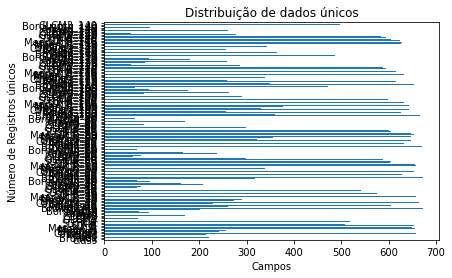

In [ ]:
def distri(data): # função para procurar valores nulos no dataset
  nun_unique_labels = data.apply(pd.Series.nunique)

  nun_unique_labels.plot(kind='barh')
  plt.xlabel('Campos')
  plt.ylabel('Número de Registros únicos')
  plt.title('Distribuição de dados únicos')

  plt.show()

distri(cover_df)

In [ ]:
# Separando os dados em X e y
X = cover_df.drop(['class'], axis=1)
y = cover_df['class']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
Oht_enc = OneHotEncoder()
X = pd.DataFrame(Oht_enc.fit_transform(X).A)

In [ ]:
# Separação de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
# importando o modelo KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)
knn_results = knn.predict(X_test)

In [ ]:
y_pred = classifier.predict(X_test)

## AVALIAÇÃO DO MODELO

In [ ]:
# importando métricas de Avaliação do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Matriz de confusão, acurácia e precisão
print("Matriz de confusão: ")
print(confusion_matrix(y_test, y_pred), "/n")

print("Relatório de classificação:"
                        , classification_report(y_test, y_pred))

print('Acurácia do modelo: ', accuracy_score(y_test, y_pred))

Matriz de confusão: 
[[26  0  0  0  8  0  0  0  0]
 [ 0  3  2  0  4  3  0  0  0]
 [ 0  6 21  0  0  2  0  0  0]
 [ 3  1  2  7 11  0  0  0  0]
 [ 7  1  0  1 29  0  0  0  0]
 [ 5  5  7  2  1 11  0  0  1]
 [ 0  2  3  0  4  0  2  0  0]
 [ 5  2  1  0  5  0  0  1  0]
 [ 2  1  0  0  3  1  0  0  2]] /n
Relatório de classificação:               precision    recall  f1-score   support

         1.0       0.54      0.76      0.63        34
         2.0       0.14      0.25      0.18        12
         3.0       0.58      0.72      0.65        29
         4.0       0.70      0.29      0.41        24
         5.0       0.45      0.76      0.56        38
         6.0       0.65      0.34      0.45        32
         7.0       1.00      0.18      0.31        11
         8.0       1.00      0.07      0.13        14
         9.0       0.67      0.22      0.33         9

    accuracy                           0.50       203
   macro avg       0.64      0.40      0.41       203
weighted avg       0.60    

In [ ]:
error = []

for i in range(1, 10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

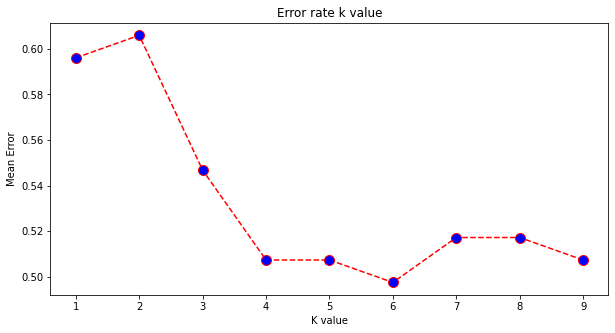

In [ ]:
# Gráfico de distribuição de erro: Análise de K
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error rate k value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

In [ ]:
# importando e aplicando mais métricas de avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
acuracia = accuracy_score(y_test, knn_results)
print('Acurácia: %f' % acuracia)
precisao = precision_score(y_test, knn_results, average='macro')
print('Precisão do modelo: %f' % precisao)
recall = recall_score(y_test, knn_results, average='macro')
print('Recall: %f' % recall)

Acurácia: 0.492611
Precisão do modelo: 0.593059
Recall: 0.383095


# TESTANDO OS DADOS COM O MODELO LINEAR REGRESSION

In [ ]:
# Importando as bibliotecas de Regressão Linear
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Dividindo o dataset em teste e treino na relação 70 - 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

In [ ]:
# Aplicando o modelo
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Avaliação do modelo R²
r2_train = lr.score(X_train, y_train)
r2_test = lr.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de test: %.2f' % r2_test)

R2 no set de treino: 1.00
R2 no set de test: 0.17


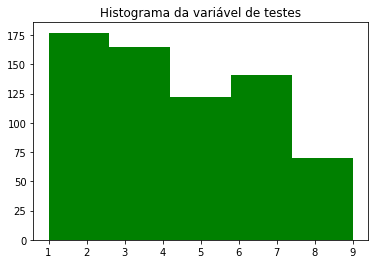

In [ ]:
# Histograma de distribuição y
import matplotlib.pyplot as plt
plt.hist(y, color='green', bins=5)
plt.title('Histograma da variável de testes')
plt.show()

# TESTANDO OS DADOS COM O MODELO SVM (SUPORT VECTOR MACHINE)

In [ ]:
# Importando a biblioteca do SVM
from sklearn import svm

In [ ]:
# Rodando o modelo
clf = svm.SVC()
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)